Hamiltoniano:

$$ H = - \sum_{\langle i, j \rangle} J s_i s_j - \sum_{i}(H(t) + h_i)s_i $$

El campo aleatorio se saca de la distribución:

$$ P(h) =  \frac{1}{\sqrt{2 \pi} R} e^{-h^2/2R^2} $$

In [1]:
type MicroEstado
    σ::Array{Int,2}
    h::Array{Float64,2}
    #Vamos a suponer que todas las configuraciones son cuadradas
    L::Int
end

In [2]:
import Base.show 

show(io::IO, m::MicroEstado) = print(io, m.σ)

show (generic function with 91 methods)

In [3]:
function edo_inicial(L::Int)
    σ = -ones(Int, (L,L))
    
    h = Array(Float64, (L,L))
    for i in 1:L^2
        # Temporal, hay que cambiar la distribución
        h[i] = randn()
    end
        
    MicroEstado(σ, h, L)
end

edo_inicial (generic function with 1 method)

In [56]:
m = edo_inicial(4)

4x4 Array{Int64,2}:
 -1  -1  -1  -1
 -1  -1  -1  -1
 -1  -1  -1  -1
 -1  -1  -1  -1

In [6]:
function energia_espin(m::MicroEstado, i::Int, j::Int)
    σ = m.σ ; L = m.L
    σ[i,j]*( σ[mod1(i-1, L),j] + σ[mod1(i+1, L),j] + σ[i,mod1(j-1, L)] + σ[i,mod1(j+1, L)] ) + 
    m.h[i,j]
end

energia_espin (generic function with 1 method)

In [9]:
energia_espin(m, 2,4)

5.062367882894085

In [10]:
m.h

4x4 Array{Float64,2}:
 -1.17557     0.292194   1.92198     1.29634 
 -0.246927    2.12184   -1.06754     1.06237 
 -0.227286    0.906815  -0.0411415  -0.801502
  0.0107697  -1.00884   -0.203893    0.498619

In [11]:
?randn

INFO: Loading help data...


Base.randn([rng], dims or [dims...])

   Generate a normally-distributed random number with mean 0 and
   standard deviation 1. Optionally generate an array of normally-
   distributed random numbers.


In [12]:
using PyPlot

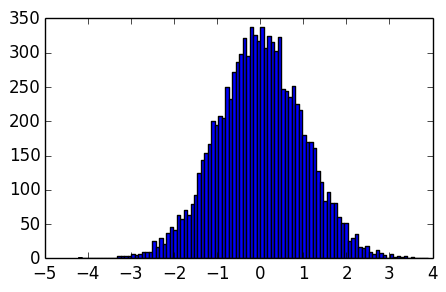

In [51]:
n = 10_000
no_cajas = 100
x = randn(n)

figure(figsize=(5,3))
plt.hist(x, no_cajas);

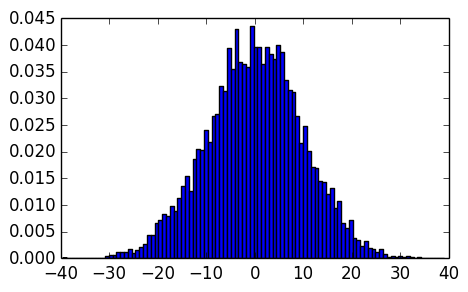

In [53]:
n = 10_000
no_cajas = 100
x = randn(n)

figure(figsize=(5,3))
plt.hist(10x, no_cajas, normed=true);

---

In [ ]:
function voltea_espin!(m::MicroEstado, i::Int, j::Int)
    if m.σ[i,j] == -1
        m.σ[i,j] *= -1
    end
end    
    
todas_energias(m::MicroEstado) = [energia_espin for i in 1:L, j in 1:L]

# function todas_energias(m::MicroEstado)
#     energias = Float64[]
#     for i in 1:L, j in 1:L
#         if m.σ[i,j] == -1
#             push!(energias, energia_epin(m,i,j))
#         end
#     end
#     energias
# end

# function encuentra_siguiente_espin(m::MicroEstado)
#     energias = todas_energias(m)
    
#     f = findmax(energias) # Da el máximo y el ínidice lineal del máximo
#     i = mod1(f[2], m.L)
#     j = int(ceil(f[2]/m.L)
#     f[1], i, j
# end





function avalancha
    L = m.L
    energias = todas_energias(m)
    
    f = findmax(energias) # Da el máximo y el ínidice lineal del máximo
    i = mod1(f[2], m.L)
    j = int(ceil(f[2]/m.L)

    H = f[1]
    energias += H
    
    if energias[mod1(i-1,L),j] < 2
        
    
    push!(por_voltear, (i,j))
    

function simulacion
    
    espines_abajo = [1:L^2]
    
    
    

In [76]:
l = [1,8]
findmax(l)

(8,2)